<a href="https://colab.research.google.com/github/yrodriguezmd/IceVision_miniprojects/blob/main/14_pseudolabel_pilot15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
!bash install_colab.sh

--2021-10-01 17:36:13--  https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 595 [text/plain]
Saving to: ‘install_colab.sh’

install_colab.sh    100%[===================>]     595  --.-KB/s    in 0s      

2021-10-01 17:36:13 (34.4 MB/s) - ‘install_colab.sh’ saved [595/595]

- Installing mmcv
installing mmcv-full from wheel.
Looking in links: https://download.openmmlab.com/mmcv/dist/cpu/torch1.9.0/index.html
     |████████████████████████████████| 22.7 MB 10.4 MB/s 
     |████████████████████████████████| 185 kB 5.0 MB/s 
- Installing mmdet
installing mmdet from https://github.com/open-mmlab/mmdetection.git.
Cloning into '/tmp/tmp5n_zjyde/mmdetection'...
remote: Enumerating objects: 2110

In [2]:
exit()

In [ ]:
import icevision
print('icevision v',icevision.__version__)
print('torch v',torch.__version__)
print('torchvision v',torchvision.__version__)

In [2]:
from icevision.all import *

In [3]:
#option 1: git clone
!git clone https://github.com/yrodriguezmd/pilot15_for_pseudolabel.git

#option 2:
#colab upload

Cloning into 'pilot15_for_pseudolabel'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [ ]:
!ls

'=5.1'		    pilot10		      pilot15_roboflow	 sci5_kni5_cvat
 checkpoints	    pilot15		      pilot3
 conv.json	    pilot15b		      pilot5
 install_colab.sh   pilot15_for_pseudolabel   sample_data


In [ ]:
!ls pilot15_for_pseudolabel/

File00001.jpg  File00005.jpg  File00009.jpg  File00013.jpg
File00002.jpg  File00006.jpg  File00010.jpg  File00014.jpg
File00003.jpg  File00007.jpg  File00011.jpg  File00015.jpg
File00004.jpg  File00008.jpg  File00012.jpg  README.md


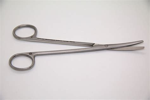

In [ ]:
image_path = Path('pilot15_for_pseudolabel/')
## images better in a folder
img_files = get_image_files(image_path)

img = PIL.Image.open(img_files[0])
img = img.convert('RGB')

img.to_thumb(150,150)

In [ ]:
# using model pretrained on coco
CLASSES = ('person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
               'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
               'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
               'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
               'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
               'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
               'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
               'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
               'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
               'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
               'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
               'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
               'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
               'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush')
class_map = ClassMap(CLASSES)
len(class_map)
# 80 + background

81

In [ ]:
print(class_map.get_by_name('knife'))
print(class_map.get_by_name('scissors'))

44
77


In [ ]:
from icevision.models.checkpoint import *

In [ ]:
model_type = models.mmdet.retinanet
backbone = model_type.backbones.resnet50_fpn_1x

In [ ]:
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(class_map),)# **extra_args) 

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/utils/weight_init.py:119: UserWarning: init_cfg without layer key, if you do not define override key either, this init_cfg will do nothing
  'init_cfg without layer key, if you do not define override'


Use load_from_local loader


In [ ]:
backbone.__dict__
# filename diff on website, file down/uploaded
#retinanet_r50_caffe_fpn_1x_coco_20200531-f11027c5.pth

{'config_path': Path('/root/.icevision/mmdetection_configs/mmdetection_configs-2.10.0/configs/retinanet/retinanet_r50_fpn_1x_coco.py'),
 'model_name': 'retinanet',
 'pretrained': True,
 'weights_url': 'http://download.openmmlab.com/mmdetection/v2.0/retinanet/retinanet_r50_fpn_1x_coco/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth'}

In [ ]:
model.eval()

imgs_array = [PIL.Image.open(file) for file in img_files]

imgs_array = [image.convert('RGB') for image in imgs_array]

img_size = 384 

valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])

infer_ds = Dataset.from_images(imgs_array, valid_tfms, class_map = class_map)

In [ ]:
len(imgs_array)

15

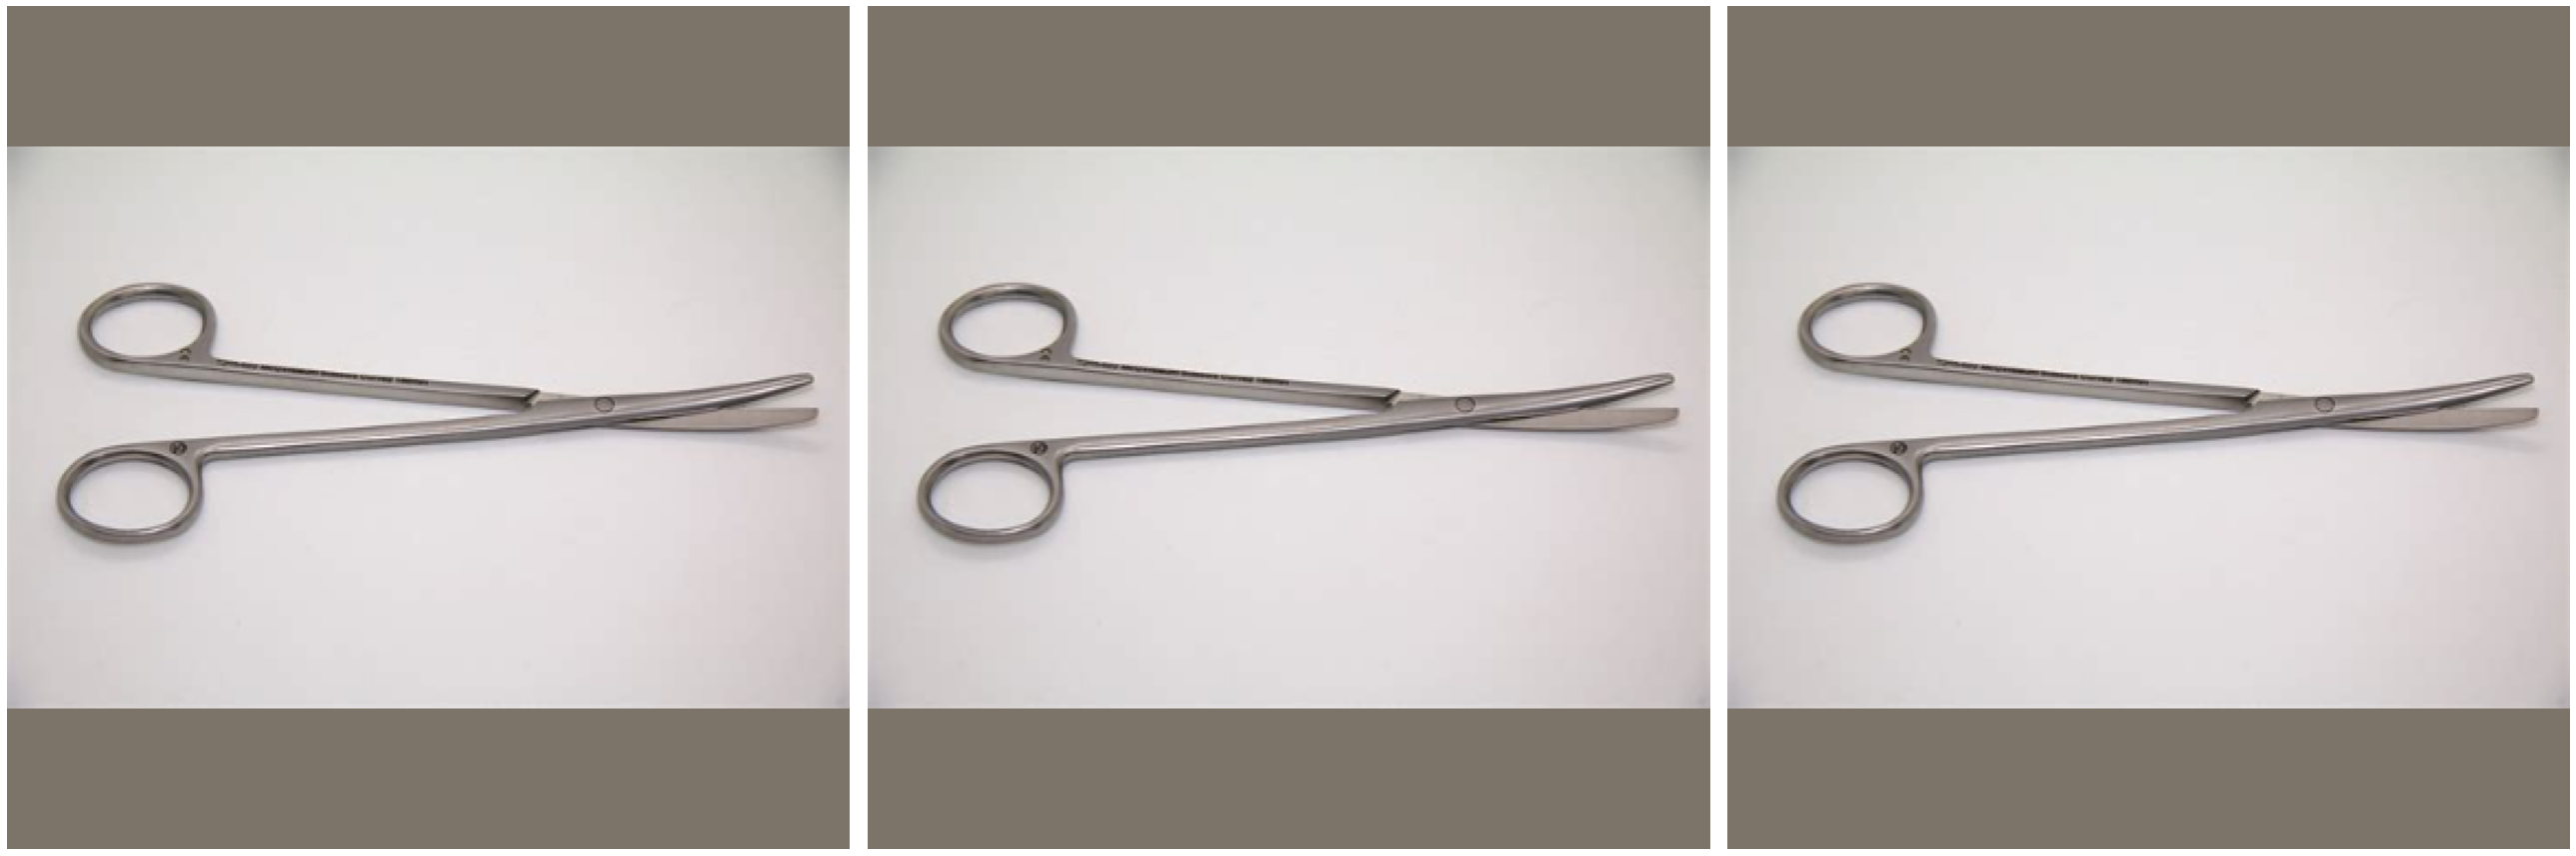

In [ ]:
samples = [infer_ds[0] for _ in range(3)]
show_samples(samples, denormalize_fn = denormalize_imagenet, ncols=3)

In [ ]:
infer_dl = model_type.infer_dl(infer_ds, batch_size=4, shuffle=False)

preds_saved = model_type.predict_from_dl(model, infer_dl,
                                          keep_images=True,) 
  # detection_threshold =0.5 default

  0%|          | 0/4 [00:00<?, ?it/s]

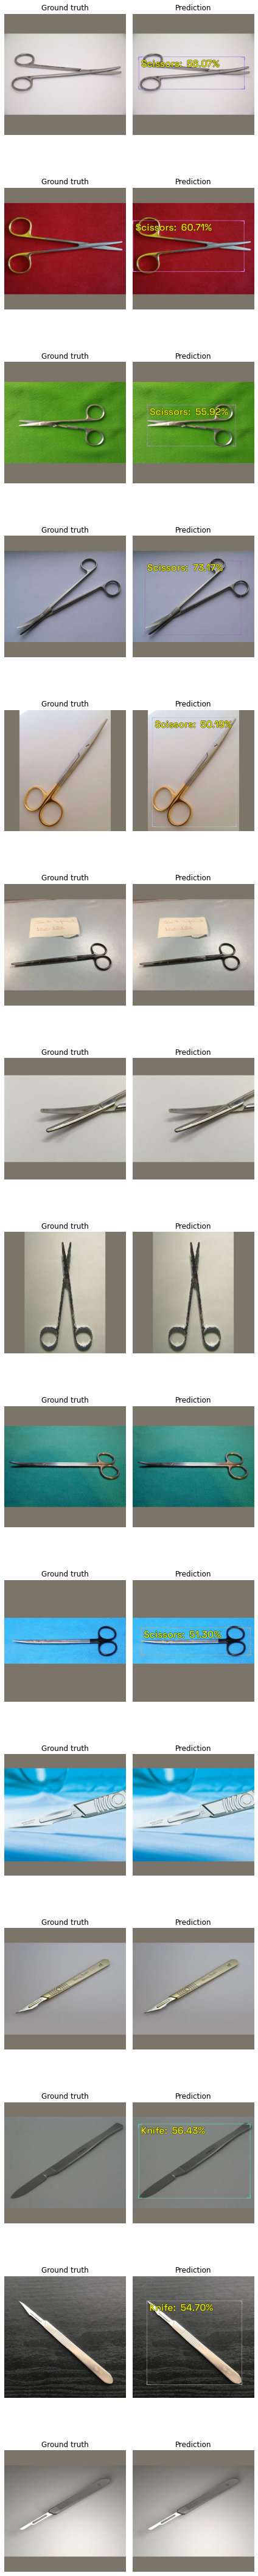

In [ ]:
show_preds(preds_saved, font_size=30, label_color='#ffff00')
#https://github.com/airctic/icevision/blob/9abbb09f47e6fc18867a5aa662885b558af2975c/icevision/models/mmdet/common/bbox/prediction.py

In [ ]:
preds_saved[3].pred


BaseRecord

common: 
	- Img: 384x384x3 <np.ndarray> Image
	- Image size ImgSize(width=384, height=384)
	- Record ID: 3
detection: 
	- Scores: [    0.73169]
	- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'frisbee': 30, 'skis': 31, 'snowboard': 32, 'sports ball': 33, 'kite': 34, 'baseball bat': 35, 'baseball glove': 36, 'skateboard': 37, 'surfboard': 38, 'tennis racket': 39, 'bottle': 40, 'wine glass': 41, 'cup': 42, 'fork': 43, 'knife': 44, 'spoon': 45, 'bowl': 46, 'banana': 47, 'apple': 48, 'sandwich': 49, 'orange': 50, 'broccoli': 51, 'carrot': 52, 'hot dog': 53, 'pizza': 54, 'donut': 55, 

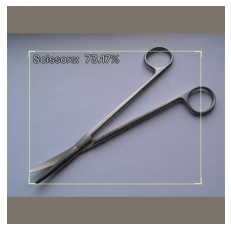

In [ ]:
show_sample(preds_saved[3])

In [ ]:
# adjusting base record to incorporate filepath
#https://github.com/airctic/icevision/blob/e60c2e2117c012ca5c323088f8577935a87c4f4e/icevision/core/record_components.py
for pred in preds_saved:
  pred.add_component(FilepathRecordComponent())

In [ ]:
# adding the filepath for each file after adjusting baserecord
for _ in range(len(preds_saved)): 
  preds_saved[_].set_filepath(img_files[_]) 

In [ ]:
for _ in range(len(preds_saved)):
  print(preds_saved[_].pred)

In [ ]:
conv = convert_preds_to_coco_style(preds_saved) 
conv
## bboxes in xmin(x top left), ymin (y top left), w, h
# same as convert_records_to_coco_style(preds_saved)
# https://github.com/airctic/icevision/blob/master/icevision/data/convert_records_to_coco_style.py#L78
# https://github.com/pytorch/vision/blob/master/references/detection/coco_utils.py

{'annotations': [{'area': 33662.645,
   'bbox': [19.931686, 137.91849, 332.61865, 101.204926],
   'category_id': 77,
   'id': 1,
   'image_id': 0,
   'iscrowd': 0,
   'score': 0.5606874},
  {'area': 56464.758,
   'bbox': [1.3802032, 103.58666, 350.53656, 161.08093],
   'category_id': 77,
   'id': 2,
   'image_id': 1,
   'iscrowd': 0,
   'score': 0.60713655},
  {'area': 36321.07,
   'bbox': [47.154373, 136.14746, 277.7403, 130.7735],
   'category_id': 77,
   'id': 3,
   'image_id': 2,
   'iscrowd': 0,
   'score': 0.5592206},
  {'area': 70827.54,
   'bbox': [39.20453, 79.08946, 302.43195, 234.19331],
   'category_id': 77,
   'id': 4,
   'image_id': 3,
   'iscrowd': 0,
   'score': 0.73168886},
  {'area': 91006.11,
   'bbox': [62.6736, 25.728973, 264.19226, 344.46924],
   'category_id': 77,
   'id': 5,
   'image_id': 4,
   'iscrowd': 0,
   'score': 0.5018938},
  {'area': 29697.889,
   'bbox': [27.475174, 150.21854, 343.97247, 86.33798],
   'category_id': 77,
   'id': 6,
   'image_id': 9,
 

In [ ]:
conv['annotations'][3] # based on preds_saved

{'area': 120378.16,
 'bbox': [13.125702, 8.169327, 358.65936, 335.63367],
 'category_id': 77,
 'id': 4,
 'image_id': 3,
 'iscrowd': 0,
 'score': 0.74269056}

In [ ]:
add_info = {
    "info": {
    "description": "Surgery Instruments",
    "url": "http://cocodataset.org",
    "version": "1.0",
    "year": 2021,
    "contributor": "MR",
    "date_created": "2021/09/27"
    },
  "categories": [
                 ## adjusted to 80 classes, 
                 ## limiting categories
    {
      "supercategory": "kitchen",
      "id": 44,
      "name": "knife"
    },
    {
      "supercategory": "indoor",
      "id": 77,
      "name": "scissors"
    }
    ] }

In [ ]:
annot = {**add_info, **conv}
annot

In [ ]:
# saving dictionary as json file
f = open('annot.json','w') 
f.write(str(annot)) 
f.close()

In [ ]:
# open json in VS code or text editor, replace ' with "
# upload in roboflow

In [ ]:
# roboflow annotated
# no transforms, no resizing on roboflow
# export annotated file (in coco json form) and images

In [ ]:
#!ls

In [ ]:
# after annotating in roboflow
# use images downloaded with the annotations
parser = parsers.COCOBBoxParser(
    annotations_filepath = Path('/content/pilot15_roboflow/_annotations.coco.json'), ##
    img_dir = Path('/content/pilot15_roboflow/', ##
    mask =False)
)

In [ ]:
data_splitter = RandomSplitter([1.0,0])  # default 0.8,0.2
train_records, valid_records = parser.parse(data_splitter)# default autofix=True

  0%|          | 0/15 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/15 [00:00<?, ?it/s]

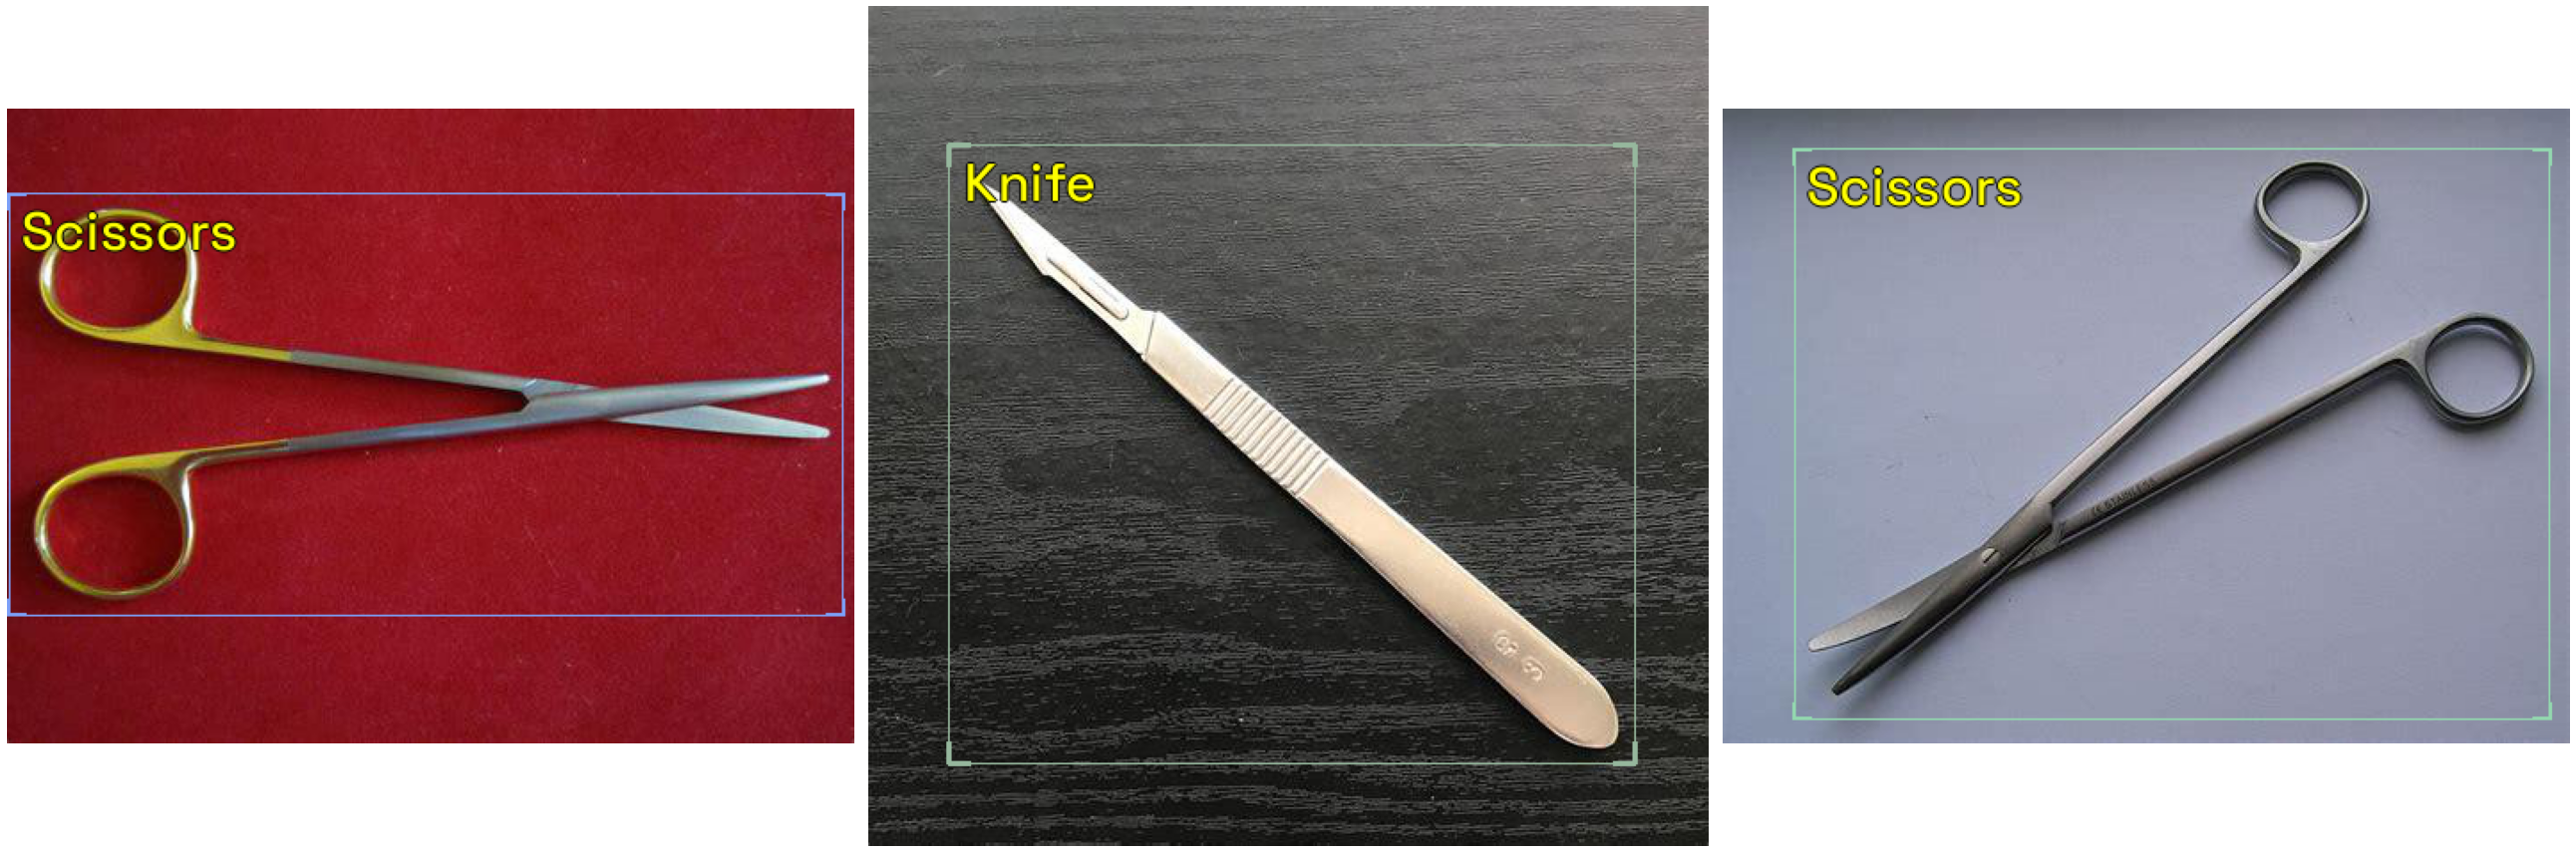

In [ ]:
show_records(train_records[:3],ncols=3, font_size=30, label_color = '#ffff00')

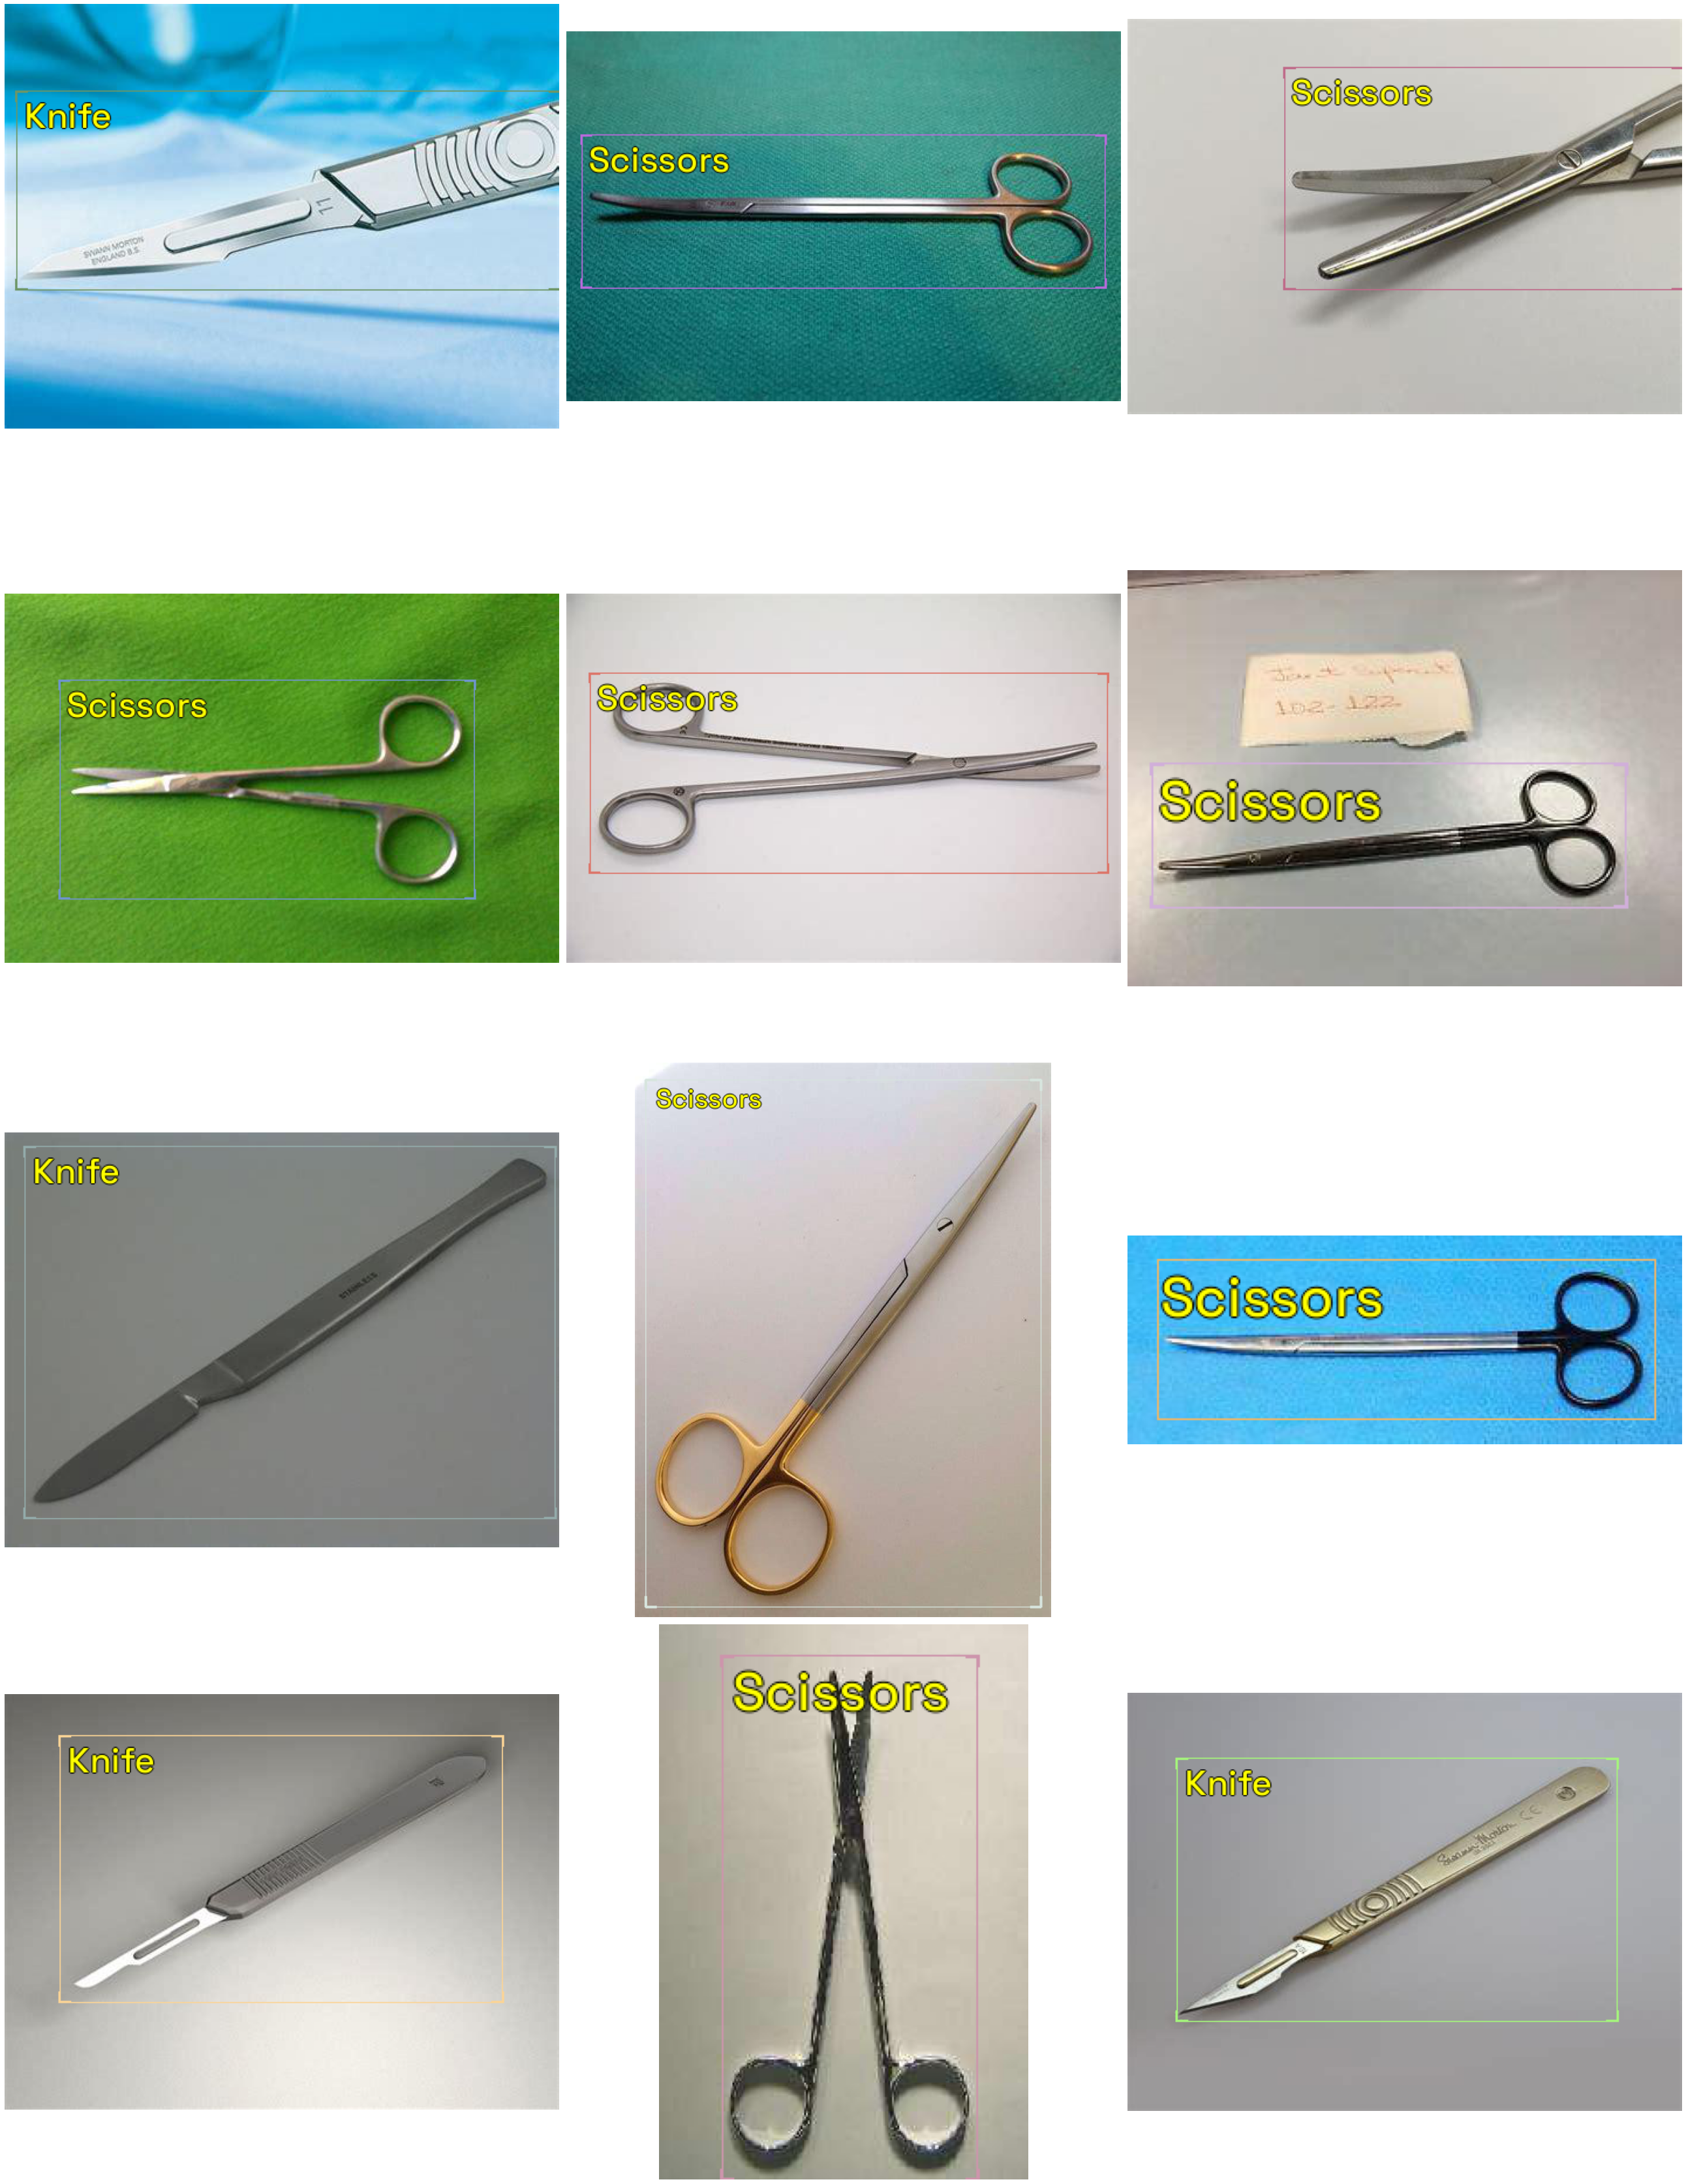

In [ ]:
show_records(train_records[3:],ncols=3, font_size=30, label_color = '#ffff00')


In [ ]:
## option to decrease detection threshold, to have more baseline annotations, but mostly
#  incorrect